In [4]:
import yfinance as yf
import numpy as np

In [5]:
df = yf.download("^NSEI",start='2010-01-01')
# df = yf.download("AAPL",start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-08-08,23179.527344,24203.689453,23176.546875,23809.486328,23809.486328,28575544847
2022-08-09,23811.484375,23898.615234,22982.000000,23164.318359,23164.318359,23555719219
2022-08-10,23162.898438,24127.414062,22771.519531,23947.642578,23947.642578,32837431722


In [7]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [8]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [9]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in df['Lag_'+str(i)]]
        names.append('Lag_'+str(i)+'_dir')
    return names

In [10]:
dirname = lagit(df,5)

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,Lag_3,Lag_3_dir,Lag_4,Lag_4_dir,Lag_5,Lag_5_dir
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.074643,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.072402,-1,-0.074643,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035111,1,-0.072402,-1,-0.074643,-1,NaN,-1,NaN,-1,NaN,-1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024968,-1,0.035111,1,-0.072402,-1,-0.074643,-1,NaN,-1,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,23179.527344,24203.689453,23176.546875,23809.486328,23809.486328,28575544847,0.026972,1,0.009303,1,-0.014185,-1,0.028676,1,-0.009480,-1,-0.005744,-1
2022-08-09,23811.484375,23898.615234,22982.000000,23164.318359,23164.318359,23555719219,-0.027471,-1,0.026972,1,0.009303,1,-0.014185,-1,0.028676,1,-0.009480,-1
2022-08-10,23162.898438,24127.414062,22771.519531,23947.642578,23947.642578,32837431722,0.033257,1,-0.027471,-1,0.026972,1,0.009303,1,-0.014185,-1,0.028676,1


In [12]:
df.dropna(inplace=True)

In [13]:
from sklearn.linear_model import LogisticRegression


ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [14]:
model = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [12]:
model.fit(df[dirname],df['direction'])

LogisticRegression()

In [13]:
df['prediction_Logit'] = model.predict(df[dirname])

In [14]:
df['prediction_Logit']

Date
2010-01-12    1
2010-01-13   -1
2010-01-14    1
2010-01-15    1
2010-01-18    1
             ..
2022-06-24    1
2022-06-27    1
2022-06-28    1
2022-06-29    1
2022-06-30    1
Name: prediction_Logit, Length: 3058, dtype: int64

In [15]:
df['strat_Logit'] = df['prediction_Logit'] * df['returns']

In [16]:
np.exp(df[['returns','strat_Logit']].sum())

returns        3.006106
strat_Logit    2.976374
dtype: float64

<AxesSubplot:xlabel='Date'>

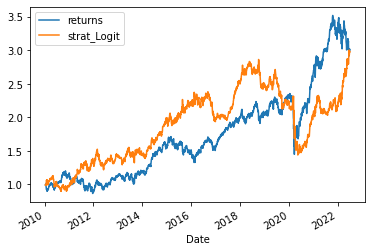

In [17]:
np.exp(df[['returns','strat_Logit']].cumsum()).plot()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test = train_test_split(df,shuffle=False,test_size=0.25,random_state=0)

In [20]:
train = train.copy()

In [21]:
test = test.copy()

In [22]:
model = LogisticRegression()

In [23]:
model.fit(train[dirname],train['direction'])

LogisticRegression()

In [24]:
test['prediction_Logit'] = model.predict(test[dirname])

In [25]:
test['strat_Logit'] = test['prediction_Logit'] * test['returns']

In [26]:
np.exp(test[['returns','strat_Logit']].sum())

returns        1.322875
strat_Logit    1.087084
dtype: float64

<AxesSubplot:xlabel='Date'>

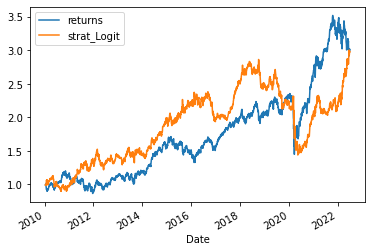

In [27]:
np.exp(df[['returns','strat_Logit']].cumsum()).plot()

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(test['direction'],test['prediction_Logit'])

array([[114, 238],
       [114, 299]], dtype=int64)

In [30]:
print(classification_report(test['direction'],test['prediction_Logit']))

              precision    recall  f1-score   support

          -1       0.50      0.32      0.39       352
           1       0.56      0.72      0.63       413

    accuracy                           0.54       765
   macro avg       0.53      0.52      0.51       765
weighted avg       0.53      0.54      0.52       765

